In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('cust_seg.csv')
df

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2
...,...,...,...,...,...,...,...,...,...,...
195,31,1,2,2,2,1,55,59,62.4,64.9
196,145,1,4,2,1,3,42,46,45.6,50.6
197,187,1,4,2,2,1,57,41,68.4,45.1
198,118,1,4,2,1,1,55,62,69.6,68.2


## No 1a

Jalankan fungsi-fungsi dasar: info(), describe().

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [4]:
df.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


## No 1b

 Buat histogram untuk melihat persebaran data beberapa variable yang menurut Anda
penting.


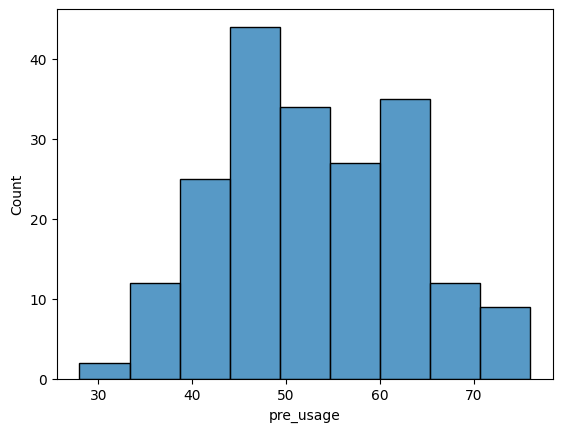

In [5]:
sns.histplot(df, x="pre_usage")
plt.show()

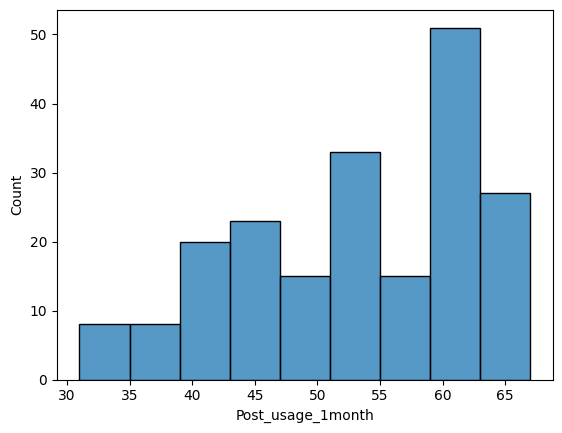

In [20]:
sns.histplot(df, x="Post_usage_1month")
plt.show()

## No 2a

H0 : Tidak ada perbedaan penggunaan kartu kredit sebelum kampanye dengan 1 bulan setelah kampanye <br/>
H1 : Ada perbedaan penggunaan kartu kredit sebelum kampanye dengan 1 bulan setelah kampanye

In [21]:
t_value, p_value = ttest_rel(df['pre_usage'], df['Post_usage_1month'])

In [7]:
p_value

0.3868186820914985

In [9]:
if p_value < 0.05:
    print('H0 ditolak')
else:
    print('H0 diterima')

H0 diterima


Kesimpulan: <br/>
Tidak ada perbedaan signifikan penggunaan kartu kredit sebelum kampanye dengan 1 bulan setelah kampanye.

## No 2b

H0 : Tidak ada perbedaan penggunaan kartu kredit sebelum kampanye dengan 2 bulan setelah kampanye <br/>
H1 : Ada perbedaan penggunaan kartu kredit sebelum kampanye dengan 2 bulan setelah kampanye

In [10]:
t_value, p_value = ttest_rel(df['pre_usage'], df['post_usage_2ndmonth'])

In [11]:
p_value

4.2957338280128356e-16

In [12]:
if p_value < 0.05:
    print('H0 ditolak')
else:
    print('H0 diterima')

H0 ditolak


Kesimpulan: <br/>
Ada perbedaan signifikan penggunaan kartu kredit sebelum kampanye dengan 1 bulan setelah kampanye.

## No 3a

In [13]:
df_lk = df[df['sex'] == 0]
df_pr = df[df['sex'] == 1]

H0 : Tidak ada perbedaan penggunaan kartu kredit kelompok laki-laki dengan perempuan 1 bulan setelah kampanye <br/>
H1 : Ada perbedaan penggunaan kartu kredit kelompok laki-laki dengan perempuan 1 bulan setelah kampanye

In [14]:
t_value, p_value = ttest_ind(df_lk['Post_usage_1month'], df_pr['Post_usage_1month'])

In [15]:
p_value

0.00024625461203549315

In [16]:
if p_value < 0.05:
    print('H0 ditolak')
else:
    print('H0 diterima')

H0 ditolak


Kesimpulan: <br/>
Ada perbedaan penggunaan kartu kredit kelompok laki-laki dengan perempuan 1 bulan setelah kampanye

## No 3b

H0 : Tidak ada perbedaan penggunaan kartu kredit kelompok laki-laki dengan perempuan 2 bulan setelah kampanye <br/>
H1 : Ada perbedaan penggunaan kartu kredit kelompok laki-laki dengan perempuan 2 bulan setelah kampanye

In [17]:
t_value, p_value = ttest_ind(df_lk['post_usage_2ndmonth'], df_pr['post_usage_2ndmonth'])

In [18]:
p_value

0.0002462546120354815

In [19]:
if p_value < 0.05:
    print('H0 ditolak')
else:
    print('H0 diterima')

H0 ditolak


Kesimpulan: <br/>
Ada perbedaan penggunaan kartu kredit kelompok laki-laki dengan perempuan 2 bulan setelah kampanye